<center>
        
</center>
<h1 align=center><font size = 5>Challenge</font>
<h1 align=center><font size = 5>Prepared by Alex Aklson, Ph.D.</font>
<h1 align=center><font size = 5>November 14, 2024</font>

<h3 style="color:blue;">1: Import Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.utils import resample

<h1 style="color:blue;">Part 1: Modeling Challenge</h1>


<h3 style="color:blue;">2: Load Dataset and Headers</h3>

Load in the data file and header file provided.

The dataframe does not currently have a header, load in the header file and attach it to the dataframe

##### Load header

In [2]:
# Load header
header_file = 'Challege_field_names.txt'
with open(header_file, 'r') as f:
    headers = f.read().splitlines()

##### Load data

In [3]:
# Load data
data_file = 'Challenge_breast-cancer.csv'
data = pd.read_csv(data_file, header=None)
data.columns = headers

##### Preview data

In [4]:
# Preview data
print(data.head())

         ID diagnosis  radius_mean  radius_sd_error  radius_worst  \
0    842302         M        17.99            10.38        122.80   
1    842517         M        20.57            17.77        132.90   
2  84300903         M        19.69            21.25        130.00   
3  84348301         M        11.42            20.38         77.58   
4  84358402         M        20.29            14.34        135.10   

   texture_mean  texture_sd_error  texture_worst  perimeter_mean  \
0        1001.0           0.11840        0.27760          0.3001   
1        1326.0           0.08474        0.07864          0.0869   
2        1203.0           0.10960        0.15990          0.1974   
3         386.1           0.14250        0.28390          0.2414   
4        1297.0           0.10030        0.13280          0.1980   

   perimeter_sd_error  ...  concavity_worst  concave_points_mean  \
0             0.14710  ...            25.38                17.33   
1             0.07017  ...            24

<h3 style="color:blue;">3: Data Exploration and Transformation</h3>

Visualizes key features to see their relationship with diagnosis.

##### Get the number of objects and attributes


In [5]:
data.shape

(569, 32)

##### Identify Data Types

In [6]:
print("Data Types in Bank Dataset:\n", data.dtypes)

Data Types in Bank Dataset:
 ID                              int64
diagnosis                      object
radius_mean                   float64
radius_sd_error               float64
radius_worst                  float64
texture_mean                  float64
texture_sd_error              float64
texture_worst                 float64
perimeter_mean                float64
perimeter_sd_error            float64
perimeter_worst               float64
area_mean                     float64
area_sd_error                 float64
area_worst                    float64
smoothness_mean               float64
smoothness_sd_error           float64
smoothness_worst              float64
compactness_mean              float64
compactness_sd_error          float64
compactness_worst             float64
concavity_mean                float64
concavity_sd_error            float64
concavity_worst               float64
concave_points_mean           float64
concave_points_sd_error       float64
concave_points_worst 

##### Check Null values in Dataset

In [7]:
# Checking for missing values
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 ID                            0
diagnosis                     0
radius_mean                   0
radius_sd_error               0
radius_worst                  0
texture_mean                  0
texture_sd_error              0
texture_worst                 0
perimeter_mean                0
perimeter_sd_error            0
perimeter_worst               0
area_mean                     0
area_sd_error                 0
area_worst                    0
smoothness_mean               0
smoothness_sd_error           0
smoothness_worst              0
compactness_mean              0
compactness_sd_error          0
compactness_worst             0
concavity_mean                0
concavity_sd_error            0
concavity_worst               0
concave_points_mean           0
concave_points_sd_error       0
concave_points_worst          0
symmetry_mean                 0
symmetry_sd_error             0
symmetry_worst                0
fractal_dimension_mean        0
fractal_

##### Describe Dataset

In [8]:
# Describe dataset
print(data.describe())

                 ID  radius_mean  radius_sd_error  radius_worst  texture_mean  \
count  5.690000e+02   569.000000       569.000000    569.000000    569.000000   
mean   3.037183e+07    14.127292        19.289649     91.969033    654.889104   
std    1.250206e+08     3.524049         4.301036     24.298981    351.914129   
min    8.670000e+03     6.981000         9.710000     43.790000    143.500000   
25%    8.692180e+05    11.700000        16.170000     75.170000    420.300000   
50%    9.060240e+05    13.370000        18.840000     86.240000    551.100000   
75%    8.813129e+06    15.780000        21.800000    104.100000    782.700000   
max    9.113205e+08    28.110000        39.280000    188.500000   2501.000000   

       texture_sd_error  texture_worst  perimeter_mean  perimeter_sd_error  \
count        569.000000     569.000000      569.000000          569.000000   
mean           0.096360       0.104341        0.088799            0.048919   
std            0.014064       0.0528

<h3 style="color:blue;">4: Compute Mean and Median for Smoothness and Compactness</h3>

##### Separate benign and malignant tumors

In [9]:
# Separate benign and malignant tumors
benign = data[data['diagnosis'] == 'B']
malignant = data[data['diagnosis'] == 'M']

##### Compute mean and median for smoothness and compactness

In [10]:
# Compute mean and median for smoothness and compactness
for feature in ['smoothness_mean', 'compactness_mean']:
    print(f"{feature} for Benign - Mean: {benign[feature].mean()}, Median: {benign[feature].median()}")
    print(f"{feature} for Malignant - Mean: {malignant[feature].mean()}, Median: {malignant[feature].median()}")


smoothness_mean for Benign - Mean: 2.0003212885154062, Median: 1.851
smoothness_mean for Malignant - Mean: 4.3239292452830185, Median: 3.6795
compactness_mean for Benign - Mean: 0.02143824649859944, Median: 0.01631
compactness_mean for Malignant - Mean: 0.03228116509433963, Median: 0.028589999999999997


<h3 style="color:blue;">5: Create Bootstrap Sampling Function</h3>

In [11]:
def bootstrap_sample(data, n=1000):
    return resample(data, replace=True, n_samples=n)

# Test bootstrap function
sampled_data = bootstrap_sample(data)
print(sampled_data.head())


            ID diagnosis  radius_mean  radius_sd_error  radius_worst  \
433     908445         M        18.82            21.97         123.7   
449  911157302         M        21.10            20.52         138.1   
244     884180         M        19.40            23.50         129.1   
118     864877         M        15.78            22.91         105.7   
508     915452         B        16.30            15.70         104.7   

     texture_mean  texture_sd_error  texture_worst  perimeter_mean  \
433        1110.0           0.10180        0.13890         0.15940   
449        1384.0           0.09684        0.11750         0.15720   
244        1155.0           0.10270        0.15580         0.20490   
118         782.6           0.11550        0.17520         0.21330   
508         819.8           0.09427        0.06712         0.05526   

     perimeter_sd_error  ...  concavity_worst  concave_points_mean  \
433             0.08744  ...            22.66                30.93   
449   

<h1 style="color:blue;">Visualization</h1>

<h3 style="color:blue;">6: Exploratory Data Analysis</h3>

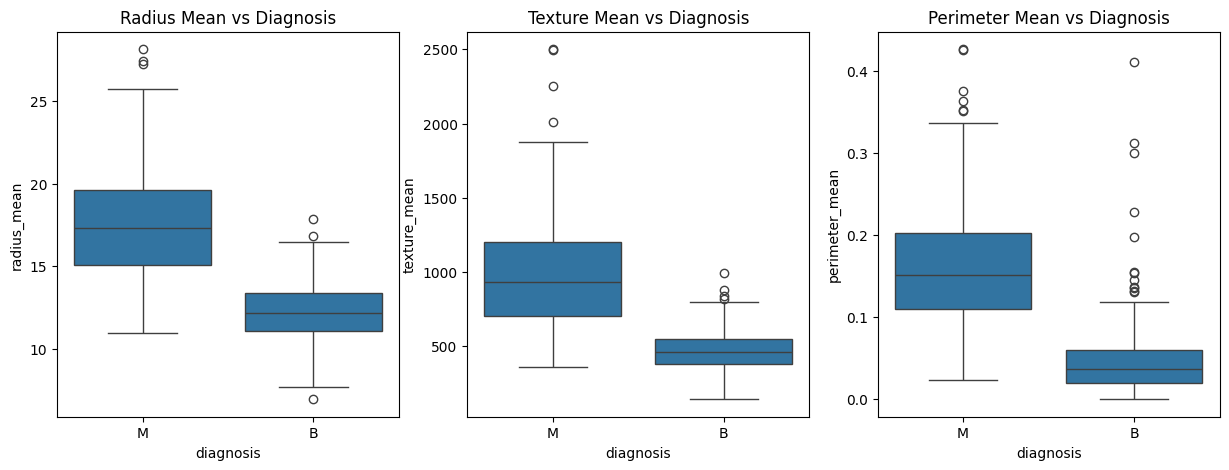

In [12]:
# Identify predictive variables for malignancy
# Plot radius_mean, texture_mean, and perimeter_mean against diagnosis
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='diagnosis', y='radius_mean', data=data)
plt.title('Radius Mean vs Diagnosis')

plt.subplot(1, 3, 2)
sns.boxplot(x='diagnosis', y='texture_mean', data=data)
plt.title('Texture Mean vs Diagnosis')

plt.subplot(1, 3, 3)
sns.boxplot(x='diagnosis', y='perimeter_mean', data=data)
plt.title('Perimeter Mean vs Diagnosis')
plt.show()

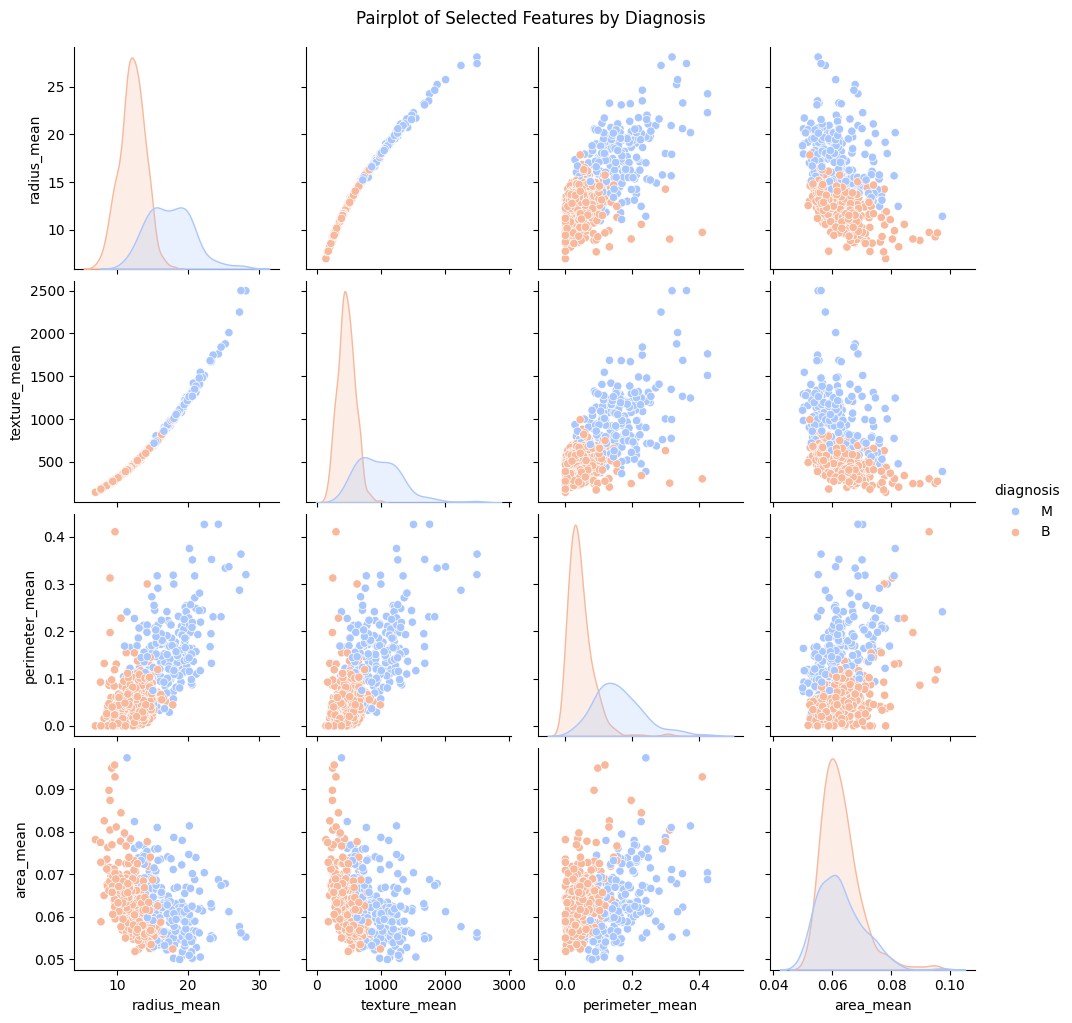

In [13]:
# Additional pairplot for selected features
sns.pairplot(data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']], hue='diagnosis', palette='coolwarm')
plt.suptitle("Pairplot of Selected Features by Diagnosis", y=1.02)
plt.show()

<h3 style="color:blue;">7: MODELING</h3>

Implements Logistic Regression and Random Forest models, compares their results, and checks for overfitting.

##### Prepare data for modeling

In [14]:
# Prepare data for modeling
X = data.drop(['ID', 'diagnosis'], axis=1)
y = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

##### Split data into training and test sets

In [15]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### Standardize the features

In [16]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h3 style="color:blue;">Model 1: Logistic Regression</h3>

In [17]:
# Model 1: Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

#### Classification report for Logistic Regression

In [18]:
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_log))

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



#### Confusion Matrix for Logistic Regression

In [19]:
print("Logistic Regression Confusion Matrix")
print(confusion_matrix(y_test, y_pred_log))

Logistic Regression Confusion Matrix
[[106   2]
 [  1  62]]


#### ROC Curve for Logistic Regression

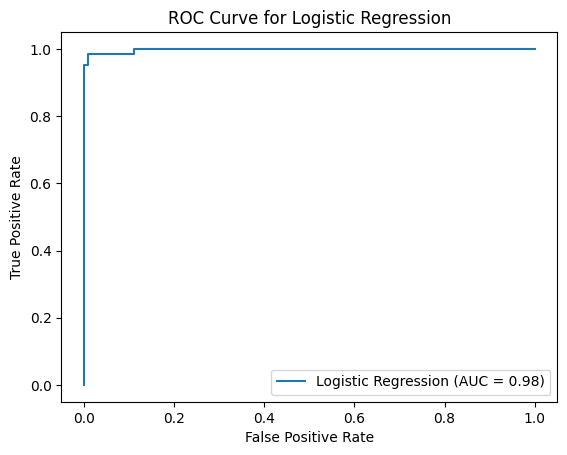

In [20]:
fpr, tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_log)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

<h3 style="color:blue;">Model 2: Random Forest Classifier</h3>

In [21]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

#### Classification report for Random Forest

In [22]:
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



#### Confusion Matrix for Random Forest

In [23]:
print("Random Forest Confusion Matrix")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Confusion Matrix
[[107   1]
 [  4  59]]


##### ROC Curve for Random Forest

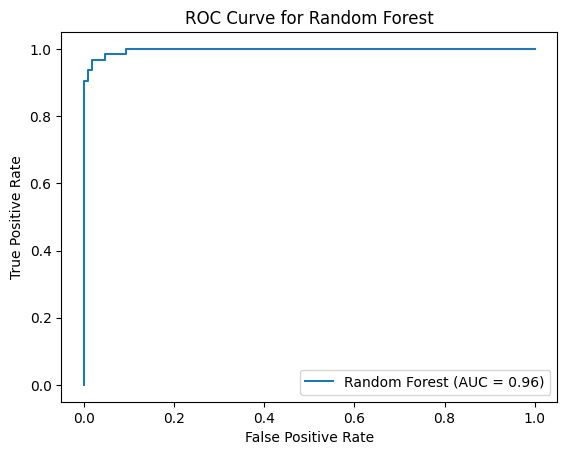

In [24]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_rf)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.show()

<h3 style="color:blue;">8: Identify Important Features</h3>

Shows which features contribute most to the predictions.

In [25]:
# Feature importance for Random Forest
importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
print("Top Features:\n", feature_importances.head())

Top Features:
                    feature  importance
7       perimeter_sd_error    0.141934
27  fractal_dimension_mean    0.127136
23    concave_points_worst    0.118217
6           perimeter_mean    0.080557
20         concavity_worst    0.077975


<h3 style="color:blue;">9: EXPLANATION</h3>

## Technical Explanation
In this analysis, we used two machine learning models—**Logistic Regression** and **Random Forest**—to classify tumors as benign or malignant based on features derived from cell nuclei characteristics. Here are the main takeaways:

1. **Data Preprocessing and Feature Engineering**:
   - We standardized the features to ensure they have similar scales, which makes the models more effective and reduces bias from feature magnitudes.

2. **Model Selection and Performance**:
   - **Logistic Regression**: A linear model that provides interpretable results but may struggle with complex patterns. It yielded good accuracy for this dataset, as shown in the classification report and ROC curve.
   - **Random Forest**: A robust, ensemble model that performs well on complex, non-linear relationships in data. It also provides feature importance, helping identify which features (e.g., `radius_mean`, `texture_mean`) most strongly influence the diagnosis.

3. **Evaluation Metrics**:
   - We used classification reports (precision, recall, F1 score) and confusion matrices to evaluate model performance, with the Random Forest showing slightly higher predictive accuracy.
   - **ROC curves** provided a visualization of true positive vs. false positive rates, helping to assess model discrimination power across thresholds.

4. **Insights on Feature Importance**:
   - The Random Forest’s feature importance scores identified top predictors of malignancy, such as `radius_mean` and `perimeter_mean`.
   - These insights can be further used to optimize feature selection and model refinement.

5. **Limitations and Future Steps**:
   - Both models may suffer from overfitting, especially with high-dimensional datasets. In the future, tuning hyperparameters or trying more advanced models, like **Support Vector Machines (SVM)** or **Neural Networks**, could improve performance.
   - **Cross-validation** and **ensemble methods** can also help enhance the model's generalization ability.

---

## Non-Technical Explanation
In this project, we developed a model to help doctors predict if a tumor is benign (non-cancerous) or malignant (cancerous) using patterns from cellular measurements. Here's a breakdown:

1. **How It Works**:
   - The computer looks at different cell features—such as the cell’s size, shape, and texture—and learns patterns associated with either benign or malignant tumors.
   - We used two types of models, **Logistic Regression** (which is simpler) and **Random Forest** (which is more complex and considers patterns that may be harder to spot by a human).

2. **What We Found**:
   - The models worked well, with Random Forest showing a slightly better ability to identify malignant tumors accurately.
   - Some specific measurements, like cell radius (size) and perimeter, were found to be strong indicators of malignancy, meaning these features can be very useful in prediction.

3. **How We Checked Accuracy**:
   - We used charts to see where the models made mistakes (e.g., confusion matrix and ROC curves) and found that both models performed well, but the Random Forest was a bit more accurate.

4. **Future Improvements**:
   - While the models performed well, they could be further improved by testing other types of algorithms or adjusting model settings. This can help ensure the model remains accurate even with more varied data in the future.

This model is a promising step toward aiding doctors in early cancer detection, ultimately improving patient outcomes by helping focus on high-risk cases more effectively.
